In [1]:
cd ../..

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from guitar_set.core import *
import jams
import jams.display
import matplotlib.pyplot as plt
%matplotlib nbagg

In [4]:
# file = '/Users/tom/Music/DataSet/test-set_processed/jf_Funk3-112-C#_c_hex_cln.wav'
# ref_jam = jams.load('/Users/tom/Music/DataSet/test-set_man/jf_Funk3-112-C#_c_man.jams')

filepath = '/Users/tom/Music/DataSet/test-set_processed/js_SS2-107-Ab_c_hex_cln.wav'
ref_jam = jams.load('/Users/tom/Music/DataSet/test-set_man/js_SS2-107-Ab_c_man.jams')

In [5]:
h = HexRecording(filepath)

Loading /Users/tom/Music/DataSet/test-set_processed/js_SS2-107-Ab_c_hex_cln.wav
length of y: 771750, sr: 22050
length of y: 771750, sr: 22050
length of y: 771750, sr: 22050
length of y: 771750, sr: 22050
length of y: 771750, sr: 22050
length of y: 771750, sr: 22050
finished loading


In [85]:
states = h.detect_jams_acf()

max_lag:300 min_lag:66
acf.shape:(300, 1507)
max_lag:225 min_lag:50
acf.shape:(225, 1507)
max_lag:168 min_lag:37
acf.shape:(168, 1507)
max_lag:126 min_lag:28
acf.shape:(126, 1508)
max_lag:100 min_lag:22
acf.shape:(100, 1508)
max_lag:75 min_lag:16
acf.shape:(75, 1508)
voicing threshold: at 70%, or amplitude: 0.454536440969


In [86]:
new_ref = jams.JAMS()
new_ref.file_metadata = ref_jam.file_metadata
for a in ref_jam.annotations:
    new_a = jams.convert(a, 'pitch_contour')   
    new_a = pyin.pad_sparse_anno(new_a)
    new_ref.annotations.append(new_a)

In [97]:
str_num = 3
anno_est = h.jam.annotations[str_num]
anno_ref = new_ref.annotations[str_num]
jams.eval.melody(est=anno_est, ref=anno_ref)

OrderedDict([('Voicing Recall', 0.125),
             ('Voicing False Alarm', 0.21428571428571427),
             ('Raw Pitch Accuracy', 0.053571428571428568),
             ('Raw Chroma Accuracy', 0.071428571428571425),
             ('Overall Accuracy', 0.41964285714285715)])

<IPython.core.display.Javascript object>


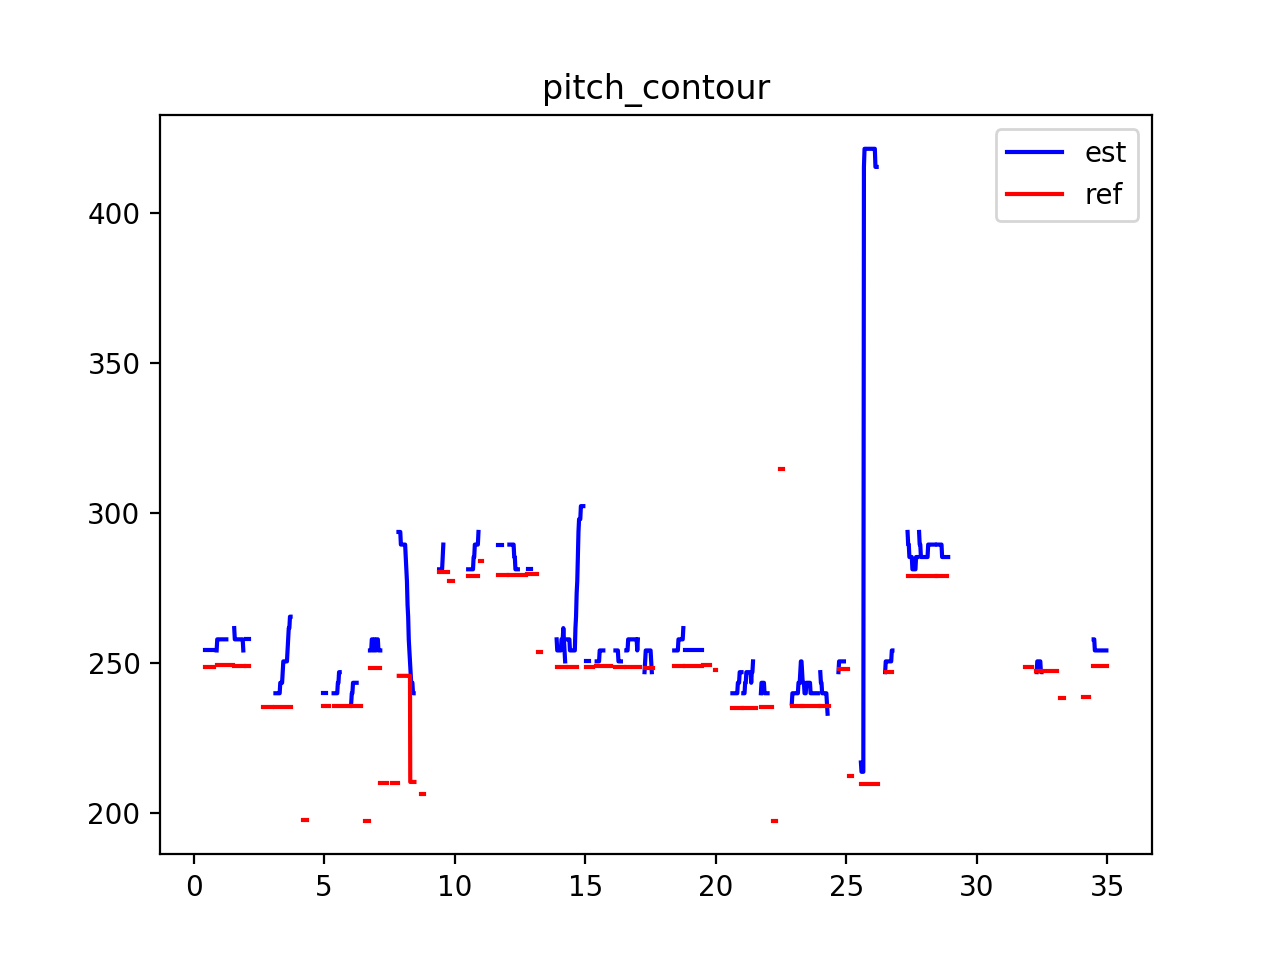

In [98]:
# times = librosa.frames_to_time(np.arange(len(anno_est.data)))
times = np.arange(0, anno_ref.duration, step=0.01)
value_list = anno_ref.to_samples(times=times)

dense_anno = jams.Annotation(namespace='pitch_contour', duration = anno_est.duration)
for (t, v) in zip(times, value_list):
    dense_anno.append(time=t, duration=0.0, value=v[0])

plt.figure()
jams.display.display(anno_est, color='b', label='est', meta=False)
jams.display.display(dense_anno, color='r', label='ref', meta=False)
plt.legend()
plt.show()

In [99]:
jams.eval.melody(est=anno_est, ref=dense_anno)

OrderedDict([('Voicing Recall', 0.65992102665350449),
             ('Voicing False Alarm', 0.029850746268656716),
             ('Raw Pitch Accuracy', 0.36920039486673245),
             ('Raw Chroma Accuracy', 0.40029615004935837),
             ('Overall Accuracy', 0.62228571428571433)])

In [104]:
h.jam

<JAMS(file_metadata=<FileMetadata(...)>,
      annotations=[6 annotations],
      sandbox=<Sandbox(...)>)>

In [105]:
h.jam.validate()

True

In [106]:
save_path = '/Users/tom/Music/DataSet/test.jams'
h.jam.save(save_path)

TypeError: False is not JSON serializable

<IPython.core.display.Javascript object>


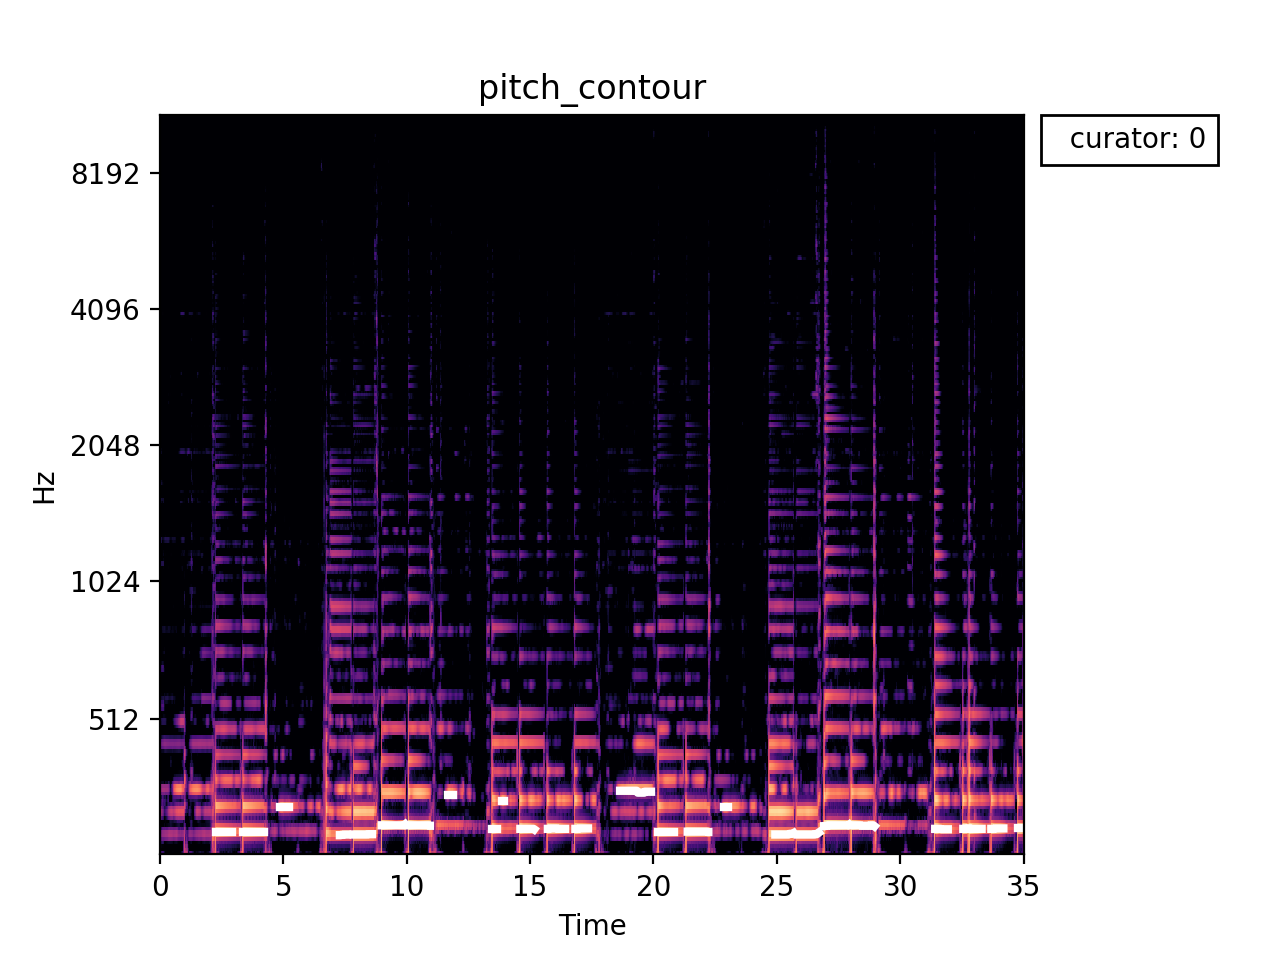

<IPython.core.display.Javascript object>


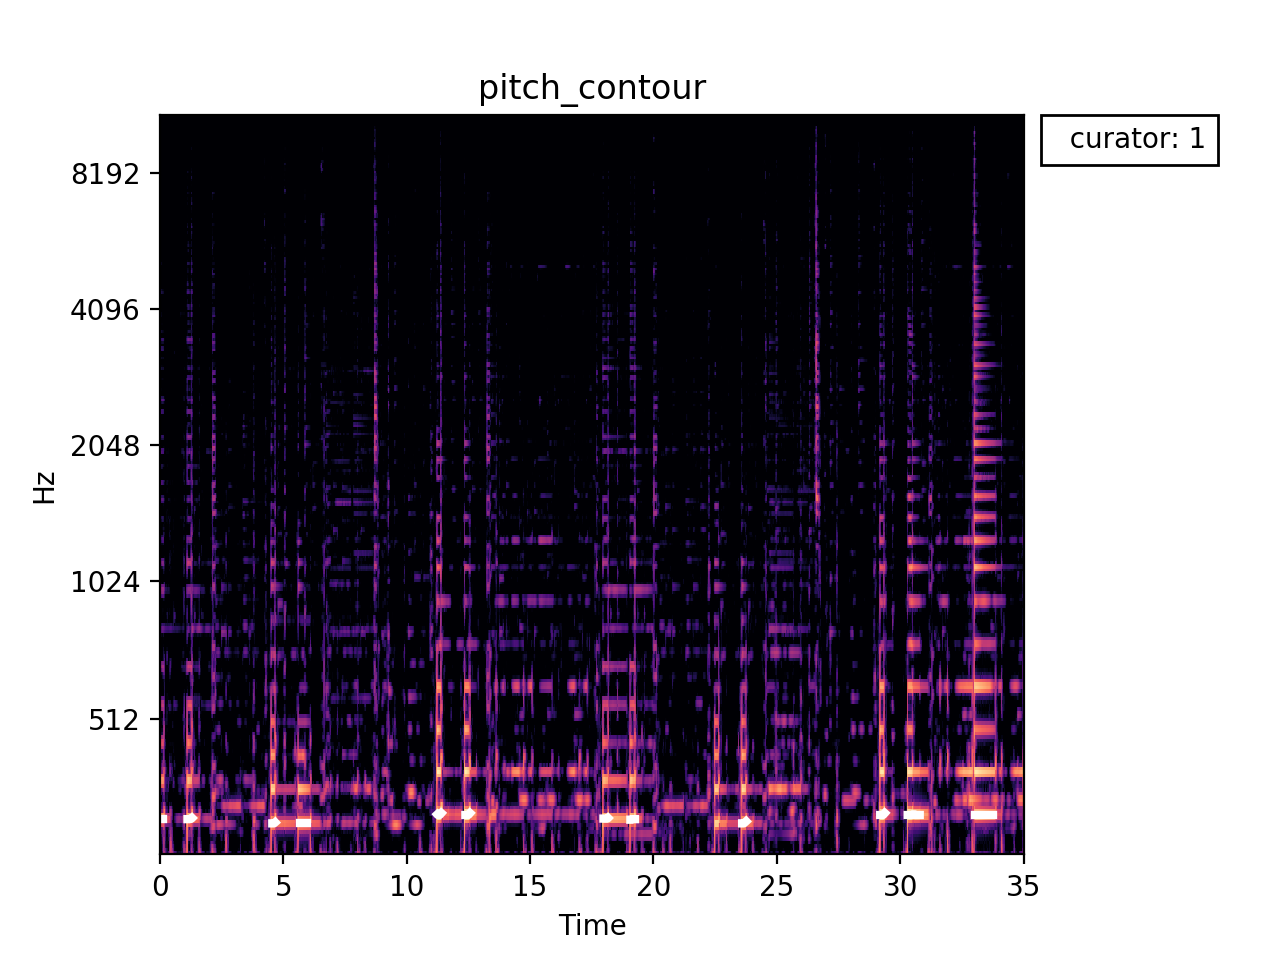

<IPython.core.display.Javascript object>


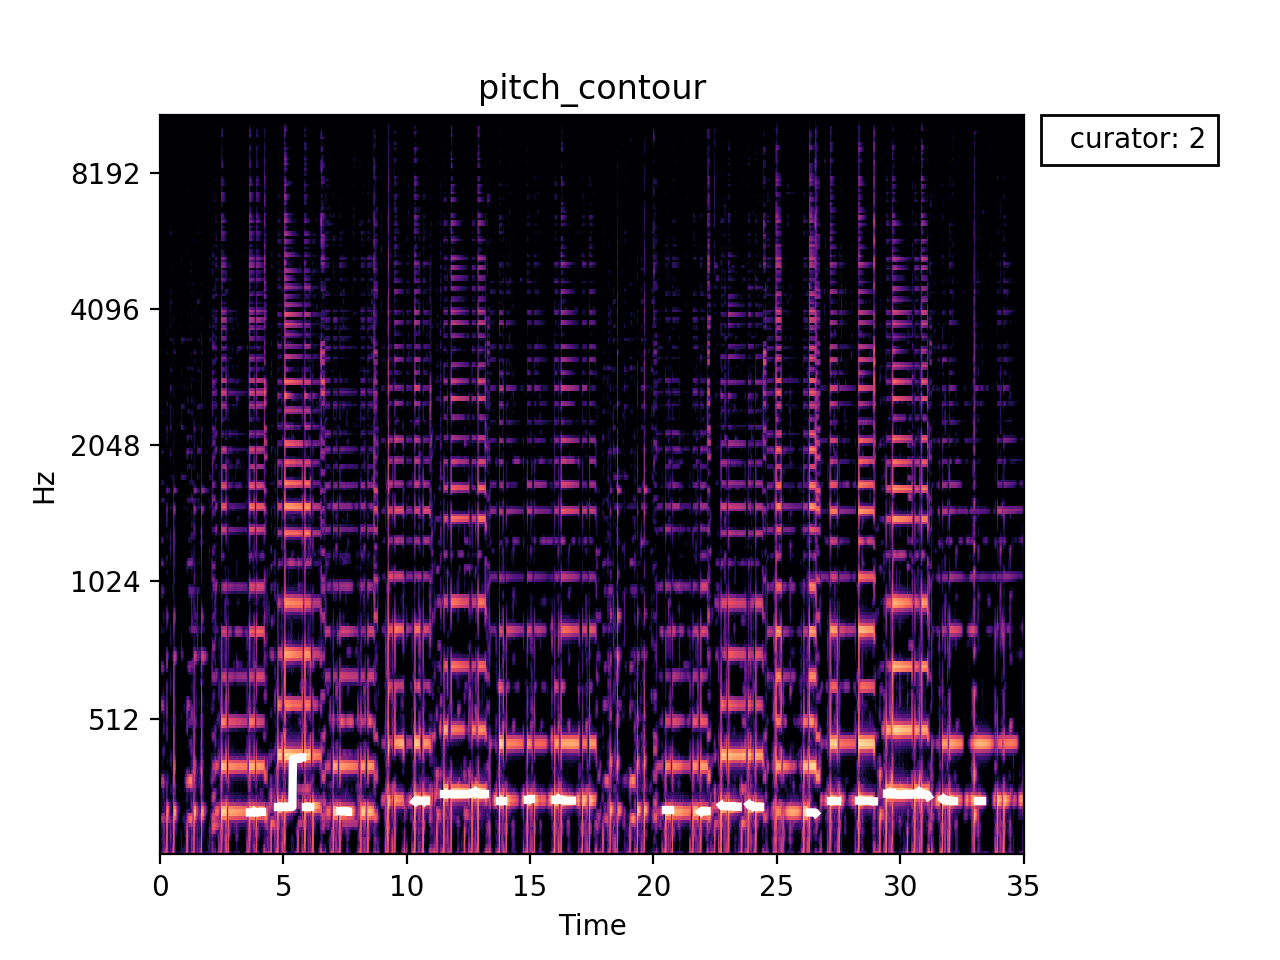

<IPython.core.display.Javascript object>


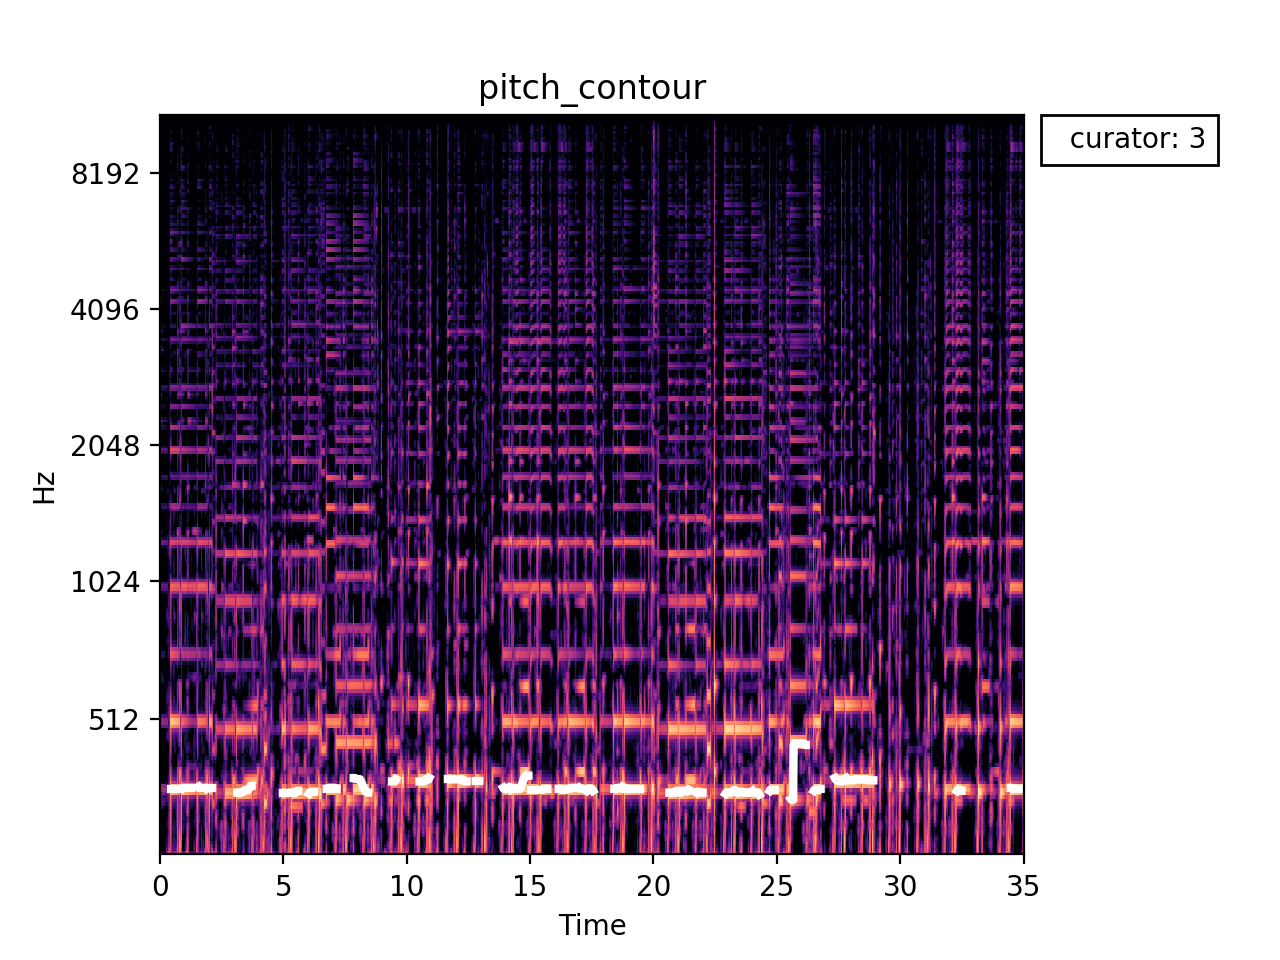

<IPython.core.display.Javascript object>


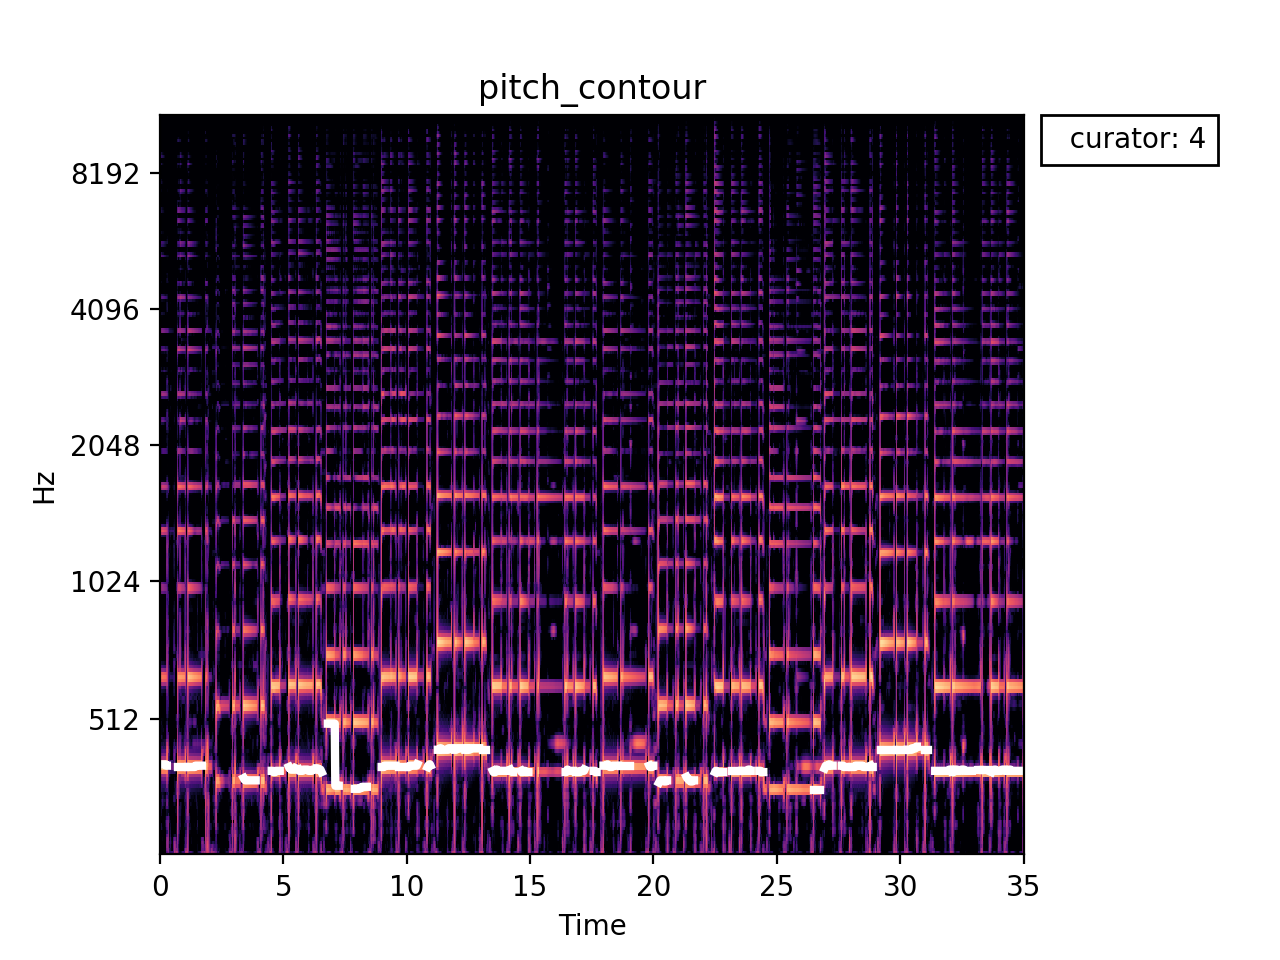

<IPython.core.display.Javascript object>


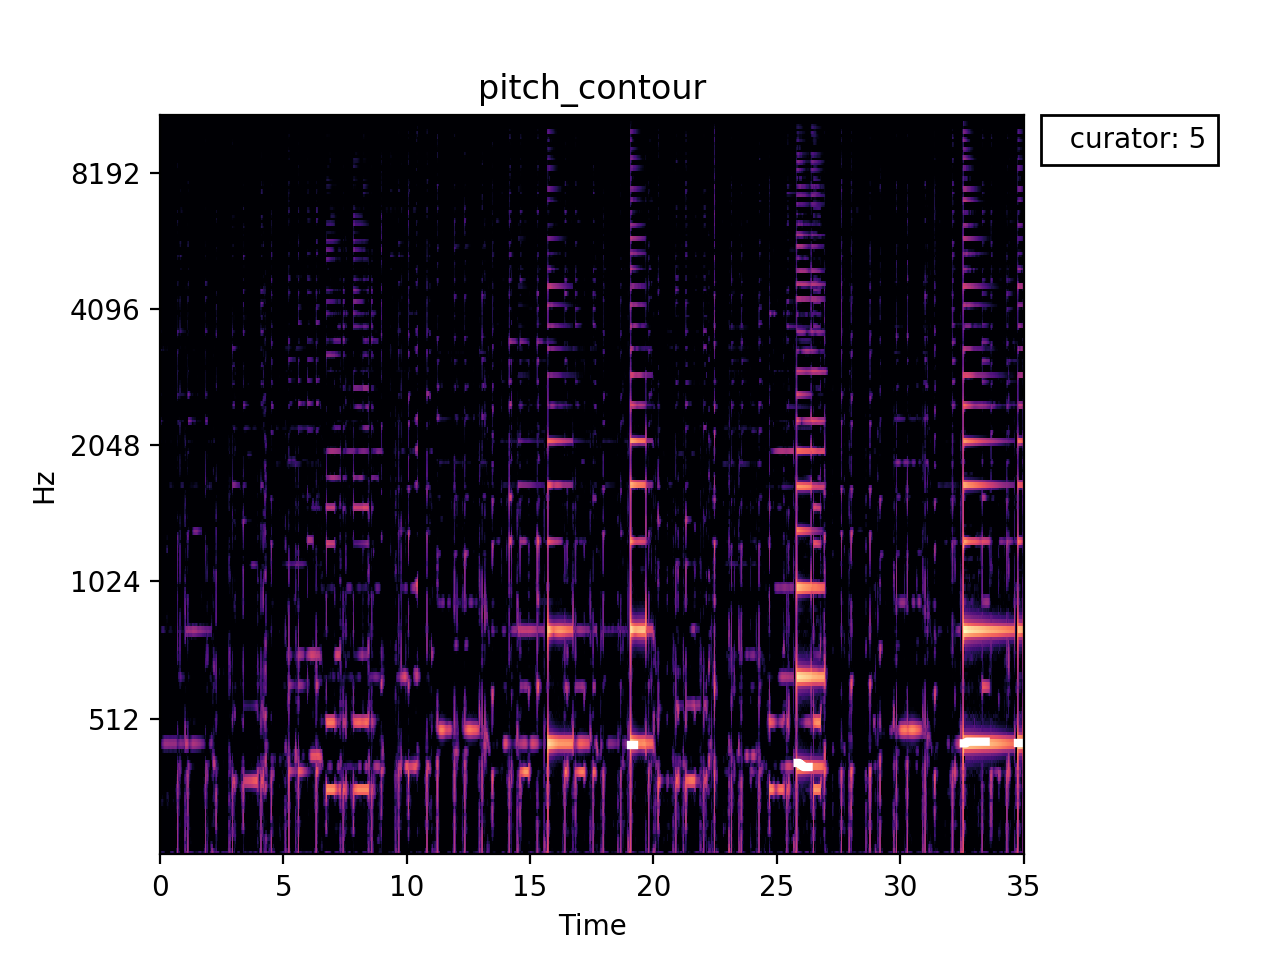

In [107]:
h.visualize_f0s()